# Problem statement

The objective is to cluster the customers of an e-commerce platform into distinct groups based on their purchasing behavior.

The dataset contains the following columns:

- InvoiceNo (integer)
- StockCode (string)
- Description (string)
- Quantity (integer)
- InvoiceDate (date)
- UnitPrice (decimal)
- CustomerID (integer)
- Country (string)

By analyzing the TotalAmount spent and TotalTransactions made by each customer, the company aims to identify different customer segments for targeted marketing strategies, personalized product offerings, and improved customer service.

The clustering process involves data preprocessing, feature engineering, outlier detection and removal, data scaling, and optimal cluster determination through both the Elbow Method and Silhouette Score, culminating in the application of K-Means clustering to categorize customers into meaningful segments.

The notebook contains 6 exercises in total:

* [Exercise 1](#ex_1)
* [Exercise 2](#ex_2)
* [Exercise 3](#ex_3)
* [Exercise 4](#ex_4)
* [Exercise 5](#ex_5)
* [Exercise 6](#ex_6)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# data_path = '/content/drive/My Drive/data/clustering-data.csv'

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
#from sklearn_extra.cluster import KMeansExtra

# Step 1: Load the Dataset
# from google.colab import files
# uploaded = files.upload()

df = pd.read_csv('/content/clustering-data.csv', encoding='latin1')

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


Shape of the DataFrame: (541909, 8)

First few rows of the DataFrame:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Column names and data types:
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     objec

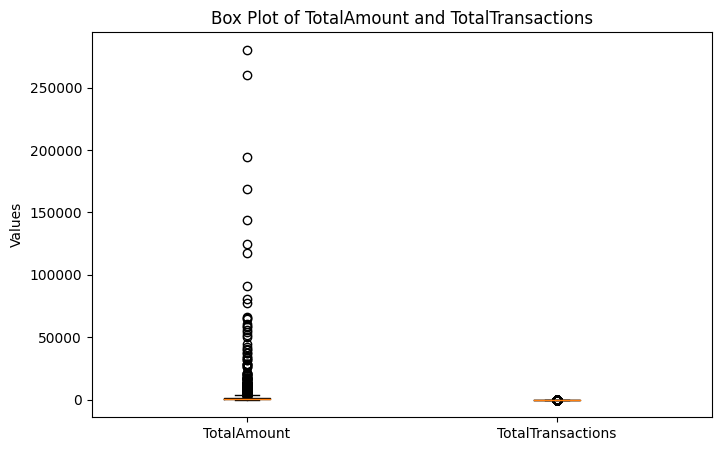

Shape of DataFrame after removing outliers: (3912, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

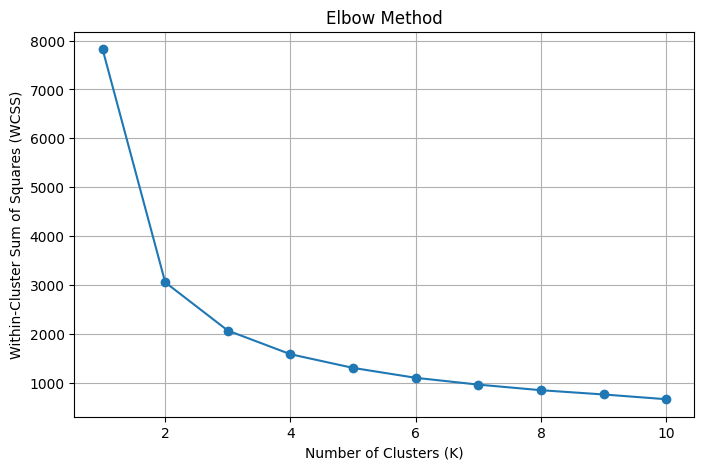

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

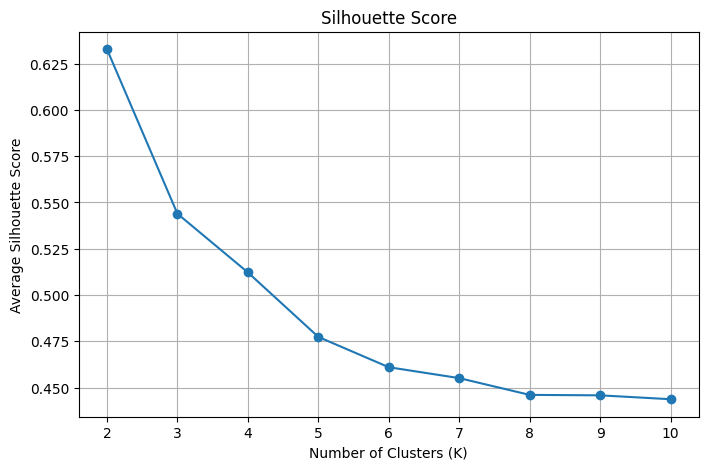

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


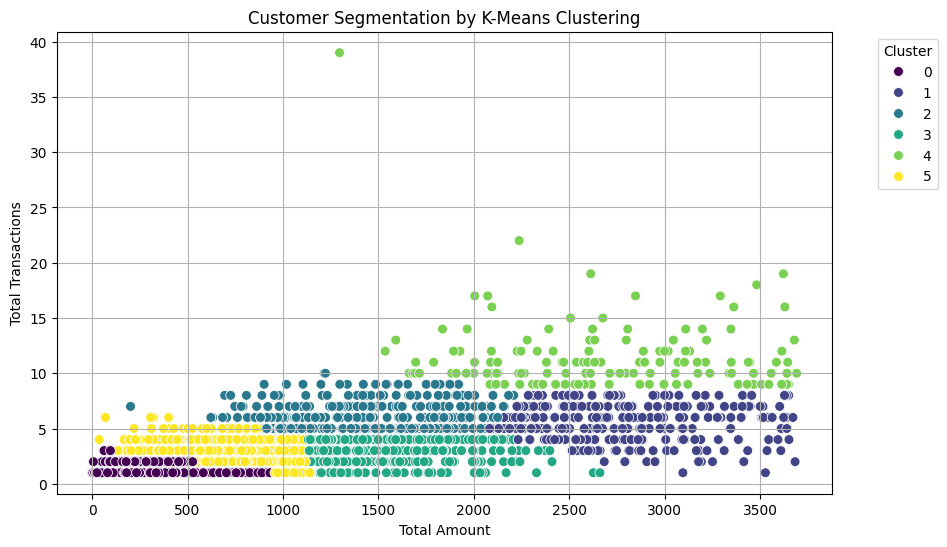

In [ ]:
# Step 2: Inspect the Data
print("Shape of the DataFrame:", df.shape)
print("\nFirst few rows of the DataFrame:")
print(df.head())
print("\nColumn names and data types:")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isnull().sum())

# Step 3: Summary Statistics
summary_stats = df.describe(include='all')
print("\nSummary Statistics:")
print(summary_stats)

# Step 4: Data Preprocessing
df_cleaned = df.dropna(subset=['CustomerID'])
df_cleaned = df_cleaned[(df_cleaned['Quantity'] >= 0) & (df_cleaned['UnitPrice'] >= 0)]
columns_to_drop = ['StockCode', 'InvoiceDate', 'Description', 'Country']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Step 5: Feature Engineering
df_cleaned['Amount'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
df_total_amount = df_cleaned.groupby('CustomerID')['Amount'].sum().reset_index()
df_total_amount.rename(columns={'Amount': 'TotalAmount'}, inplace=True)
df_total_transactions = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
df_total_transactions.rename(columns={'InvoiceNo': 'TotalTransactions'}, inplace=True)
df_segmentation = pd.merge(df_total_amount, df_total_transactions, on='CustomerID')

# Step 6: Checking for Outliers
df_segmentation.drop('CustomerID', axis=1, inplace=True)
plt.figure(figsize=(8, 5))
plt.boxplot([df_segmentation['TotalAmount'], df_segmentation['TotalTransactions']], labels=['TotalAmount', 'TotalTransactions'])
plt.title('Box Plot of TotalAmount and TotalTransactions')
plt.ylabel('Values')
plt.show()

# Step 7: Removing Outliers from TotalAmount column
Q1 = df_segmentation['TotalAmount'].quantile(0.25)
Q3 = df_segmentation['TotalAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_segmentation = df_segmentation[(df_segmentation['TotalAmount'] >= lower_bound) & (df_segmentation['TotalAmount'] <= upper_bound)]
print("Shape of DataFrame after removing outliers:", df_segmentation.shape)

# Step 8: Data Scaling using Standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_segmentation)
df_scaled = pd.DataFrame(df_scaled, columns=df_segmentation.columns)

# Step 9: Finding Optimal Number of Clusters - Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# Step 10: Finding Optimal Number of Clusters - Silhouette Score Elbow Method
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score')
plt.grid(True)
plt.show()

# Step 11: Customer Segmentation K-Means Clustering with 6 Clusters
num_clusters = 6
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(df_scaled)
df_segmentation['Cluster'] = kmeans_model.labels_

# Step 12: Visualization of Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalAmount', y='TotalTransactions', hue='Cluster', data=df_segmentation, palette='viridis', s=50)
plt.xlabel('Total Amount')
plt.ylabel('Total Transactions')
plt.title('Customer Segmentation by K-Means Clustering')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


<a name="ex_1"></a>
# Exercise 1: Understanding the Importance of Removing Outliers

**Question**: In the context of data preprocessing, at the step mentioned in regarding the removal of outliers, explain why it is critical to remove outliers before training a machine learning model. Discuss the potential impacts of outliers on model performance and accuracy.

**Answer**: Write your answer here

Removing outliers before training a machine learning model, especially in the context of clustering, is critical for several reasons. Outliers can have a significant impact on the performance and accuracy of clustering models. Here are some key reasons why handling outliers is essential:

1. **Distorted Cluster Centers:**
   - Outliers can significantly distort the calculation of cluster centers in clustering algorithms, such as k-means.
   - Since clustering aims to group similar data points together, outliers can pull the cluster centers towards themselves, leading to inaccurate representations of the actual clusters.

2. **Influence on Distance Metrics:**
   - Many clustering algorithms rely on distance metrics to measure the similarity between data points.
   - Outliers can introduce large distances, skewing the distance metrics and affecting the assignment of data points to clusters.
   - This can result in clusters that are less cohesive and meaningful.

3. **Increased Variability and Spread:**
   - Outliers can contribute to increased variability and spread within clusters, making it challenging for clustering algorithms to identify compact and well-defined clusters.
   - Clusters may appear more scattered, and the algorithm may struggle to identify cohesive groups.

4. **Unrepresentative Cluster Characteristics:**
   - Outliers can introduce characteristics that are unrepresentative of the majority of data points within a cluster.
   - Clustering algorithms may mistakenly assign outliers to existing clusters, leading to clusters that do not accurately reflect the characteristics of the majority of data points.

5. **Model Sensitivity:**
   - Clustering models can be sensitive to outliers, impacting the convergence and stability of the clustering process.
   - Models might converge to suboptimal solutions when outliers are present, affecting the overall quality of the clustering results.

6. **Difficulty in Interpreting Results:**
   - Clusters that include outliers may be harder to interpret and understand.
   - Outliers can obscure the underlying structure of the data, making it challenging to extract meaningful insights from the clustering results.

7. **Impact on Model Evaluation:**
   - Outliers can lead to inaccurate assessments of clustering model performance.
   - Evaluation metrics, such as silhouette score or Davies-Bouldin index, may be negatively affected by the presence of outliers, giving a false sense of the model's effectiveness.

8. **Robustness of Clustering Algorithms:**
   - Certain clustering algorithms, such as k-means, assume that clusters are spherical and have equal variance. Outliers can violate these assumptions, impacting the robustness of the algorithm.

In summary, removing outliers before training a clustering model is crucial to ensure accurate and meaningful cluster assignments. This preprocessing step helps improve the performance, stability, and interpretability of the clustering model by mitigating the negative impacts of outliers on the algorithm's functioning.

<a name="ex_2"></a>
# Exercise 2: Exploring Alternative Scaling Techniques

**Question**: The notebook utilizes StandardScaler() for feature scaling. Identify at least one alternative scaling method that could be used in place of StandardScaler(). Implement this alternative method in the notebook and present the results of scaling the dataframe. Briefly compare the outcomes between the two scaling methods.

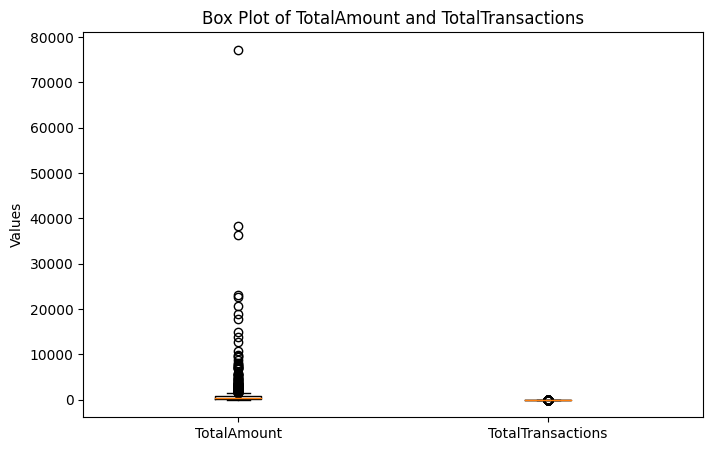

Shape of DataFrame after removing outliers: (1320, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

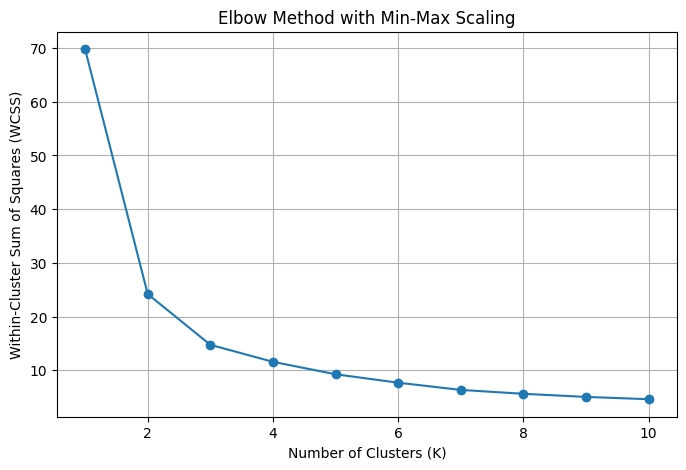

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

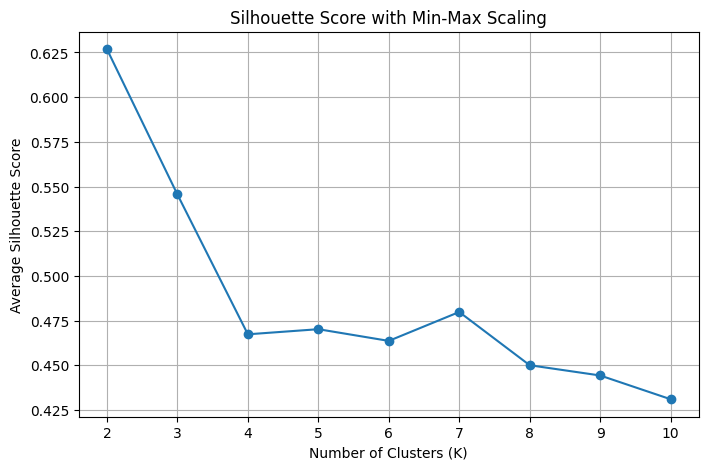

In [ ]:
# Write your code here

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 4: Data Preprocessing
df_cleaned = df.dropna(subset=['CustomerID'])
df_cleaned = df_cleaned[(df_cleaned['Quantity'] >= 0) & (df_cleaned['UnitPrice'] >= 0)]
columns_to_drop = ['StockCode', 'InvoiceDate', 'Description', 'Country']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Step 5: Feature Engineering
df_cleaned['Amount'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
df_total_amount = df_cleaned.groupby('CustomerID')['Amount'].sum().reset_index()
df_total_amount.rename(columns={'Amount': 'TotalAmount'}, inplace=True)
df_total_transactions = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
df_total_transactions.rename(columns={'InvoiceNo': 'TotalTransactions'}, inplace=True)
df_segmentation = pd.merge(df_total_amount, df_total_transactions, on='CustomerID')

# Step 6: Checking for Outliers
df_segmentation.drop('CustomerID', axis=1, inplace=True)
plt.figure(figsize=(8, 5))
plt.boxplot([df_segmentation['TotalAmount'], df_segmentation['TotalTransactions']], labels=['TotalAmount', 'TotalTransactions'])
plt.title('Box Plot of TotalAmount and TotalTransactions')
plt.ylabel('Values')
plt.show()

# Step 7: Removing Outliers from TotalAmount column
Q1 = df_segmentation['TotalAmount'].quantile(0.25)
Q3 = df_segmentation['TotalAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_segmentation = df_segmentation[(df_segmentation['TotalAmount'] >= lower_bound) & (df_segmentation['TotalAmount'] <= upper_bound)]
print("Shape of DataFrame after removing outliers:", df_segmentation.shape)

# Step 8: Data Scaling using Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax_scaled = minmax_scaler.fit_transform(df_segmentation)
df_minmax_scaled = pd.DataFrame(df_minmax_scaled, columns=df_segmentation.columns)

# Step 9: Finding Optimal Number of Clusters - Elbow Method with Min-Max Scaling
wcss_minmax = []
for k in range(1, 11):
    kmeans_minmax = KMeans(n_clusters=k, random_state=42)
    kmeans_minmax.fit(df_minmax_scaled)
    wcss_minmax.append(kmeans_minmax.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss_minmax, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method with Min-Max Scaling')
plt.grid(True)
plt.show()

# Step 10: Finding Optimal Number of Clusters - Silhouette Score Elbow Method with Min-Max Scaling
silhouette_scores_minmax = []
for k in range(2, 11):
    kmeans_minmax = KMeans(n_clusters=k, random_state=42)
    kmeans_minmax.fit(df_minmax_scaled)
    silhouette_scores_minmax.append(silhouette_score(df_minmax_scaled, kmeans_minmax.labels_))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores_minmax, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score with Min-Max Scaling')
plt.grid(True)
plt.show()




<a name="ex_3"></a>
# Exercise 3: Comparing Cluster Evaluation Metrics

**Question**: Describe the difference between the Silhouette Score and the Elbow Method in determining the optimal number of clusters for K-means clustering. Discuss the advantages and limitations of each method.

**Answer**: Write your answer here

- The observation that silhouette scores behave differently with different scaling methods indicates that the choice of scaling method can impact the performance of the clustering algorithm.

- It's not uncommon to observe fluctuations or non-monotonic behavior in silhouette scores, especially when experimenting with different scaling techniques.

**Silhouette Score:**

1. **Definition:**
   - The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
   - Ranges from -1 to 1, where a high value indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters.

2. **Optimal Number of Clusters:**
   - The optimal number of clusters is often associated with the peak or plateau of the silhouette score.
   - A higher silhouette score suggests more clearly defined and well-separated clusters.

3. **Advantages:**
   - Takes into account both cohesion and separation, providing a comprehensive measure of cluster quality.
   - Suitable for datasets with irregular shapes and varied cluster sizes.
   - Allows for the identification of clusters even when the clusters have different densities.

4. **Limitations:**
   - Sensitive to the shape and density of clusters; may not perform well with non-convex or elongated clusters.
   - Computationally more expensive than the Elbow Method.
   - May still be challenging to interpret in cases where clusters have complex structures.

**Elbow Method:**

1. **Definition:**
   - The Elbow Method involves plotting the within-cluster sum of squares (WCSS) against the number of clusters.
   - Looks for an "elbow" point where the rate of decrease in WCSS slows down, indicating a potential optimal number of clusters.

2. **Optimal Number of Clusters:**
   - The optimal number of clusters is often associated with the point where the WCSS begins to level off.
   - The goal is to find a balance between minimizing WCSS (intra-cluster distance) and avoiding too many clusters.

3. **Advantages:**
   - Simple and computationally efficient.
   - Intuitive and easy to interpret; identifies a clear "elbow" point.
   - Suitable for convex-shaped clusters with similar densities.

4. **Limitations:**
   - Assumes that clusters are convex and have similar densities, which may not always be the case.
   - May not perform well when clusters have irregular shapes or varied densities.
   - The choice of the optimal number of clusters can be somewhat subjective, and interpretation may vary.

**Comparison:**

- **Use Case:**
  - Silhouette Score is suitable when clusters have different shapes, sizes, or densities.
  - Elbow Method may be appropriate when clusters are convex and have similar densities.

- **Interpretability:**
  - Silhouette Score provides a more nuanced measure, considering both cohesion and separation.
  - Elbow Method offers a straightforward visual interpretation but relies solely on the rate of WCSS reduction.

- **Computational Efficiency:**
  - Elbow Method is computationally less expensive as it involves fitting K-means for varying cluster numbers only once.
  - Silhouette Score requires calculating pairwise distances for each data point, making it computationally more expensive.

- **Subjectivity:**
  - Elbow Method may involve subjective interpretation of the "elbow" point.
  - Silhouette Score is less subjective, as it directly provides a quantitative measure of cluster quality.

In practice, using both methods and considering their results collectively can provide a more comprehensive understanding of the optimal number of clusters for a specific dataset and clustering task.

<a name="ex_4"></a>
# Exercise 4: Understanding K-means Clustering

**Question**: Based on the code provided in the notebook and your own knowledge, explain how the K-means algorithm works. Include a discussion on the initialization of centroids, assignment of points to the nearest cluster, the process of updating centroids, and the convergence criteria for the algorithm.

**Answer**: Write your answer here

The provided code demonstrates the application of the K-means clustering algorithm for customer segmentation. Let's break down the steps and discuss how the K-means algorithm works:

1. **Data Inspection (Step 2):**
   - The initial step involves inspecting the shape, structure, and missing values in the dataset.

2. **Summary Statistics (Step 3):**
   - Descriptive statistics are computed to provide an overview of the dataset.

3. **Data Preprocessing (Step 4):**
   - NaN values are dropped from the 'CustomerID' column.
   - Rows with negative 'Quantity' or 'UnitPrice' are removed.
   - Certain columns ('StockCode', 'InvoiceDate', 'Description', 'Country') are dropped.
   - A new feature 'Amount' is created by multiplying 'Quantity' and 'UnitPrice'.

4. **Feature Engineering (Step 5):**
   - The dataset is grouped by 'CustomerID,' and two new features are created: 'TotalAmount' (sum of 'Amount') and 'TotalTransactions' (number of unique 'InvoiceNo').

5. **Checking for Outliers (Step 6):**
   - A box plot is created to visualize the distribution of 'TotalAmount' and 'TotalTransactions.'
   - Outliers are identified and visualized.

6. **Removing Outliers (Step 7):**
   - Outliers are removed from the 'TotalAmount' column based on the interquartile range (IQR).

7. **Data Scaling using Standardization (Step 8):**
   - Standardization is applied to scale the features ('TotalAmount' and 'TotalTransactions') to have a mean of 0 and standard deviation of 1.

8. **Finding Optimal Number of Clusters - Elbow Method (Step 9):**
   - The Elbow Method is used to determine the optimal number of clusters (K).
   - The within-cluster sum of squares (WCSS) is computed for different values of K, and a plot is created to identify the elbow point.

9. **Finding Optimal Number of Clusters - Silhouette Score Elbow Method (Step 10):**
   - The Silhouette Score is computed for different values of K, and a plot is created to identify the optimal number of clusters based on the silhouette score.

10. **K-Means Clustering (Step 11):**
    - The K-means algorithm is applied with the optimal number of clusters determined from the Elbow Method (in this case, 6 clusters).
    - The model is fitted to the standardized data.

11. **Visualization of Clustering Results (Step 12):**
    - A scatterplot is created to visualize the clustering results, with 'TotalAmount' on the x-axis, 'TotalTransactions' on the y-axis, and different clusters represented by colors.

**K-Means Algorithm Overview:**
- **Initialization of Centroids:**
  - K initial centroids are randomly chosen from the data.
- **Assignment of Points to the Nearest Cluster:**
  - Each data point is assigned to the cluster with the nearest centroid (based on Euclidean distance).
- **Update Centroids:**
  - Centroids are recalculated as the mean of data points within each cluster.
- **Convergence Criteria:**
  - Iteration continues until convergence, where the centroids do not change significantly between iterations or a specified number of iterations is reached.

The final visualization provides insights into the segmentation of customers based on their 'TotalAmount' and 'TotalTransactions,' with each cluster assigned a distinct color. The K-means algorithm is utilized for unsupervised clustering, offering a method to group similar customers together for further analysis or targeted marketing strategies.


<a name="ex_5"></a>
# Exercise 5: Change Clustering Algorithm

- Research Alternative Clustering Algorithm beyond K-Means such as Hierarchical Clustering, DBSCAN (Density-Based Spatial Clustering of Applications with Noise), and Gaussian Mixture Models (GMM).
- Choose one alternative algorithm to explore.
- Implement the Chosen Algorithm
- Visualize the Results: Similar to how the K-Means results were visualized, plot the clusters determined by the new algorithm. Compare these clusters based on TotalAmount and TotalTransactions.
- Discuss how the clusters formed by the new algorithm differ from those created by K-Means

Shape of DataFrame after removing outliers: (1320, 2)


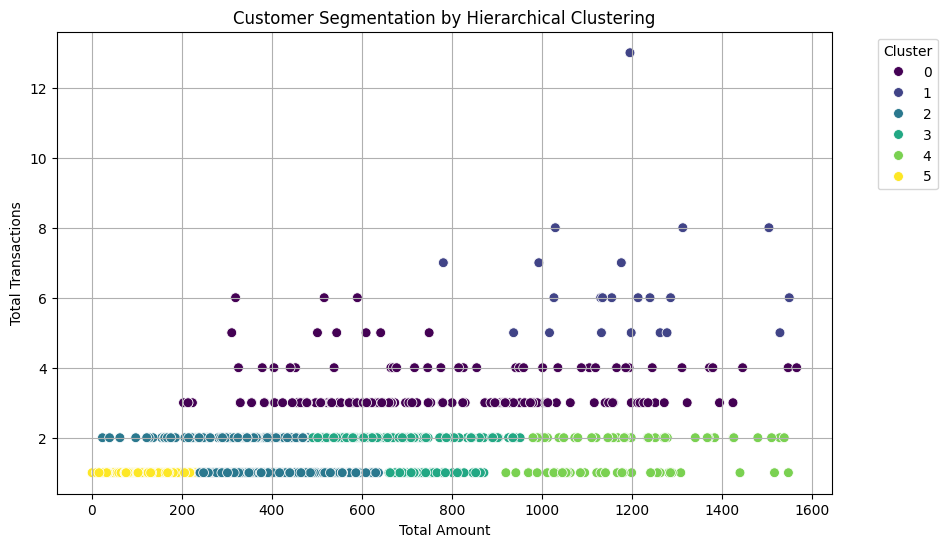

In [ ]:
# Write your code here

from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt

# Step 4: Data Preprocessing
df_cleaned = df.dropna(subset=['CustomerID'])
df_cleaned = df_cleaned[(df_cleaned['Quantity'] >= 0) & (df_cleaned['UnitPrice'] >= 0)]
columns_to_drop = ['StockCode', 'InvoiceDate', 'Description', 'Country']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Step 5: Feature Engineering
df_cleaned['Amount'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
df_total_amount = df_cleaned.groupby('CustomerID')['Amount'].sum().reset_index()
df_total_amount.rename(columns={'Amount': 'TotalAmount'}, inplace=True)
df_total_transactions = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
df_total_transactions.rename(columns={'InvoiceNo': 'TotalTransactions'}, inplace=True)
df_segmentation = pd.merge(df_total_amount, df_total_transactions, on='CustomerID')

# Step 6: Checking for Outliers
df_segmentation.drop('CustomerID', axis=1, inplace=True)
# plt.figure(figsize=(8, 5))
# plt.boxplot([df_segmentation['TotalAmount'], df_segmentation['TotalTransactions']], labels=['TotalAmount', 'TotalTransactions'])
# plt.title('Box Plot of TotalAmount and TotalTransactions')
# plt.ylabel('Values')
# plt.show()

# Step 7: Removing Outliers from TotalAmount column
Q1 = df_segmentation['TotalAmount'].quantile(0.25)
Q3 = df_segmentation['TotalAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_segmentation = df_segmentation[(df_segmentation['TotalAmount'] >= lower_bound) & (df_segmentation['TotalAmount'] <= upper_bound)]
print("Shape of DataFrame after removing outliers:", df_segmentation.shape)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_segmentation)
df_scaled = pd.DataFrame(df_scaled, columns=df_segmentation.columns)

num_clusters = 6

# Step 13: Hierarchical Clustering
hierarchical_model = AgglomerativeClustering(n_clusters=num_clusters)
df_segmentation['HierarchicalCluster'] = hierarchical_model.fit_predict(df_scaled)

# Step 14: Visualization of Hierarchical Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalAmount', y='TotalTransactions', hue='HierarchicalCluster', data=df_segmentation, palette='viridis', s=50)
plt.xlabel('Total Amount')
plt.ylabel('Total Transactions')
plt.title('Customer Segmentation by Hierarchical Clustering')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


To discuss how the clusters formed by a new algorithm, such as Hierarchical Clustering, differ from those created by K-Means, we need to consider the inherent characteristics and assumptions of each algorithm. Here are several aspects to compare:

1. **Cluster Shape:**
   - **K-Means:**
     - Assumes spherical clusters due to the use of centroids.
   - **Hierarchical Clustering:**
     - Can accommodate clusters with different shapes, as it doesn't assume spherical clusters.

2. **Hierarchy and Nesting:**
   - **K-Means:**
     - Produces flat, non-hierarchical clusters.
   - **Hierarchical Clustering:**
     - Provides a hierarchical structure, allowing for nested clusters.

3. **Cluster Size and Density:**
   - **K-Means:**
     - Clusters are assumed to be of roughly equal size and density.
   - **Hierarchical Clustering:**
     - Can form clusters of varying sizes and densities, capturing more complex patterns.

4. **Flexibility in Number of Clusters:**
   - **K-Means:**
     - Requires a predefined number of clusters (K).
   - **Hierarchical Clustering:**
     - Offers flexibility as the number of clusters can be determined at different levels of the hierarchy.

5. **Inter-Cluster Relationships:**
   - **K-Means:**
     - Assumes non-overlapping, distinct clusters.
   - **Hierarchical Clustering:**
     - Can reveal relationships between subclusters and capture overlapping patterns.

6. **Centroids vs. Medoids:**
   - **K-Means:**
     - Uses centroids as representatives of clusters.
   - **Hierarchical Clustering:**
     - Does not explicitly provide centroids; medoids or central points within clusters may be considered.

7. **Sensitivity to Outliers:**
   - **K-Means:**
     - Sensitive to outliers due to the influence of centroids.
   - **Hierarchical Clustering:**
     - Can be less sensitive to outliers as it considers pairwise distances.

8. **Data Scaling Impact:**
   - **K-Means:**
     - Sensitive to the scale of features.
   - **Hierarchical Clustering:**
     - Can be less affected by scaling, especially in linkage-based methods.

9. **Algorithmic Complexity:**
   - **K-Means:**
     - Computationally less intensive and suitable for large datasets.
   - **Hierarchical Clustering:**
     - Can be computationally expensive, especially for large datasets.

10. **Silhouette Scores:**
    - Compare the Silhouette Scores for both algorithms to assess the quality of cluster assignments.

11. **Hierarchical Structure:**
    - Consider the hierarchical structure provided by Hierarchical Clustering and how it may reveal patterns at different levels.

12. **Business Interpretability:**
    - Assess how well the clusters align with the business context and whether one method provides more interpretable results.

It appears that hierarchical clustering plot contains fewer points compared to the k-means plot, even with the same number of clusters, this can arise due to the way clusters are formed in these two clustering methods.

Here are some reasons for this observation:

1. **Cluster Formation in Hierarchical Clustering:**
   - Hierarchical clustering forms clusters hierarchically, and the number of clusters is not fixed until you decide to cut the dendrogram at a certain height. This means that, during the hierarchical merging process, some data points might be grouped into larger clusters before being split into smaller ones.

2. **Dendrogram Cutting Height:**
   - When you cut the dendrogram at a certain height to define clusters, you may end up with fewer, larger clusters that contain more data points. This is because cutting at a higher level captures more general patterns in the data, resulting in a coarser segmentation.

3. **K-Means Assigns Points Directly:**
   - In k-means, each data point is directly assigned to a cluster based on the centroid it is closest to. This can result in a more evenly distributed assignment of points to clusters, giving the impression of more points in each cluster.

Hierarchical clusters appear larger and more spread out compared to the k-means clusters in scatter plot, it suggests that the hierarchical clustering algorithm, at the chosen cutting height, has formed clusters that are more extensive and encompass a greater spread of data points.

In hierarchical clustering, clusters are formed by merging data points or smaller clusters in a step-by-step manner. Depending on the linkage method and distance metric chosen, the merging process may lead to the creation of larger and more dispersed clusters.

If you cut the hierarchical dendrogram at a higher level, you are effectively defining clusters at a coarser granularity. This can result in larger clusters that cover a broader range of data points, leading to a more spread-out appearance.

Overall k-means results are easier to interpret.  

<a name="ex_6"></a>
# Exercise 6: Adjust K-Means Parameters

- Experiment with different values of n_clusters (other than 6) to see how they affect the segmentation. You can also adjust other parameters like init, n_init, or max_iter to observe their impact.
- Use silhouette scores to evaluate the segmentation quality for different numbers of clusters or parameter settings. Compare these scores to determine which configuration seems to have the best balance between cluster cohesion and separation.
- Summarize how changes in the number of clusters or other K-Means parameters impact the customer segmentation.

Shape of DataFrame after removing outliers: (1320, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


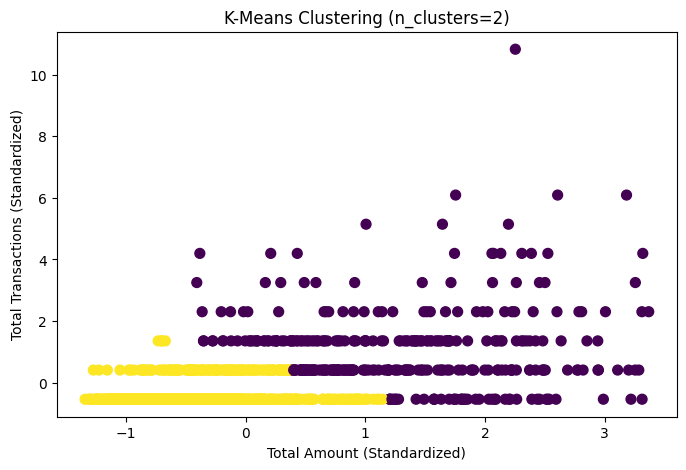

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


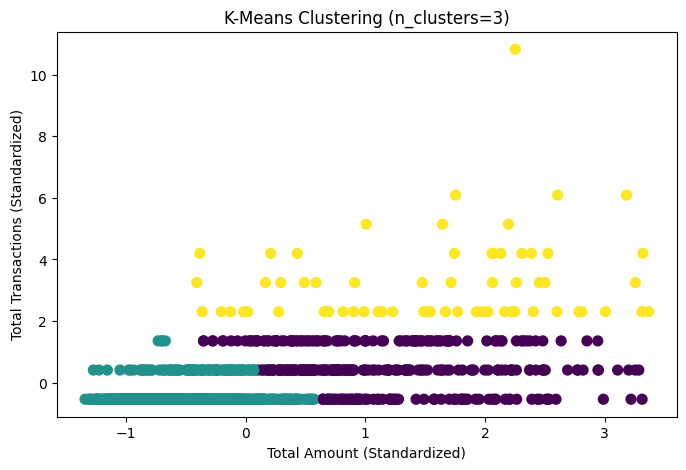

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


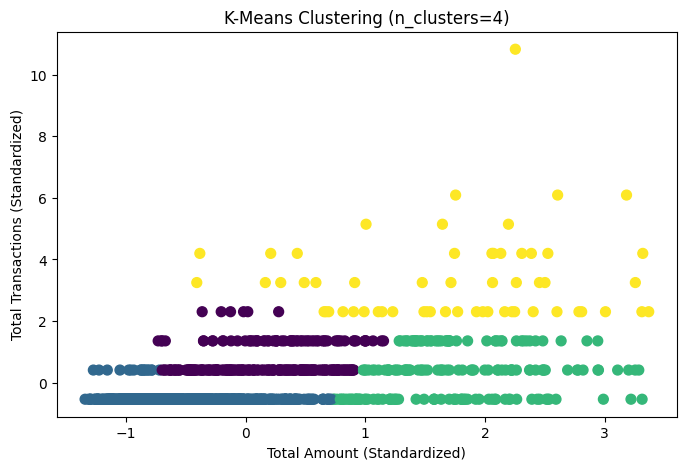

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


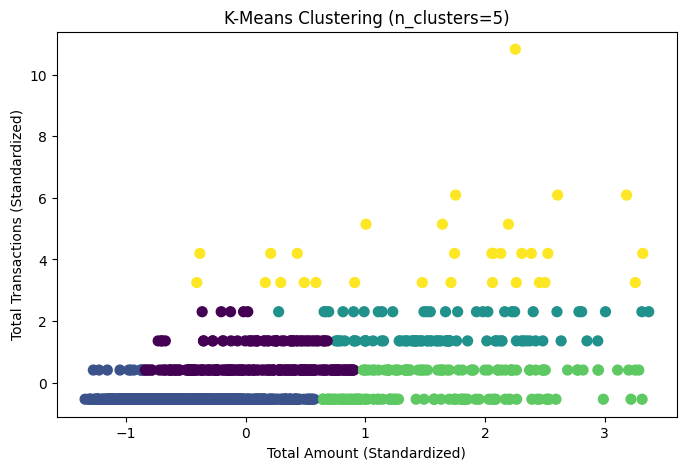

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


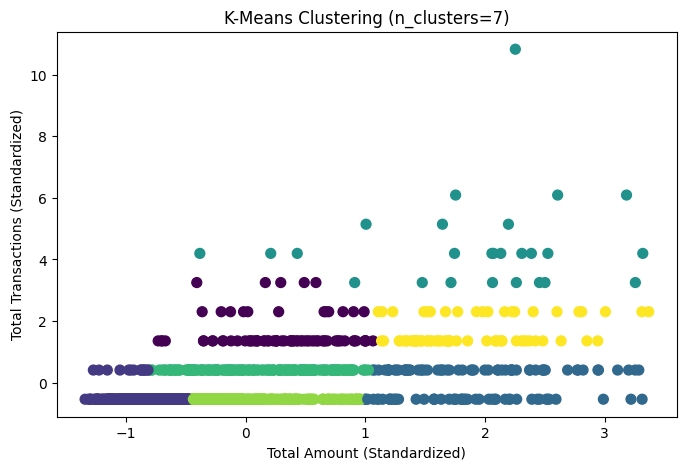

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


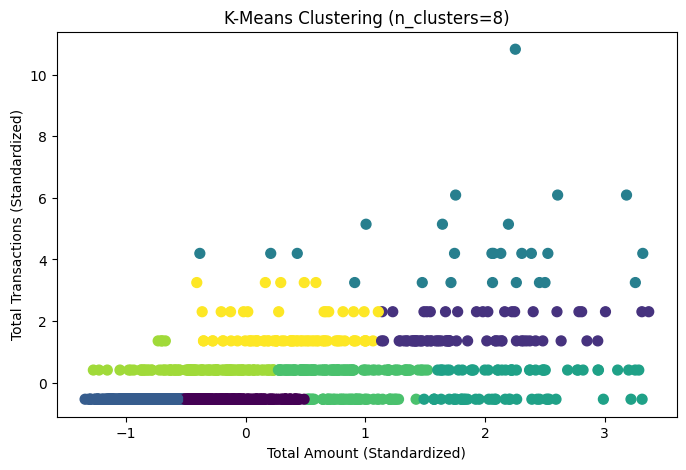

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


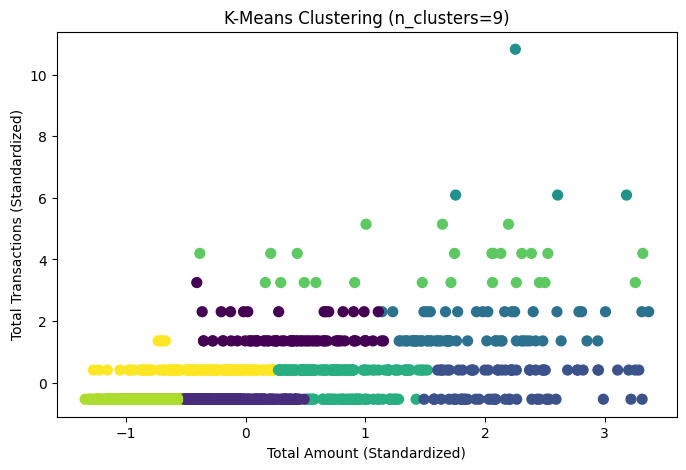

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


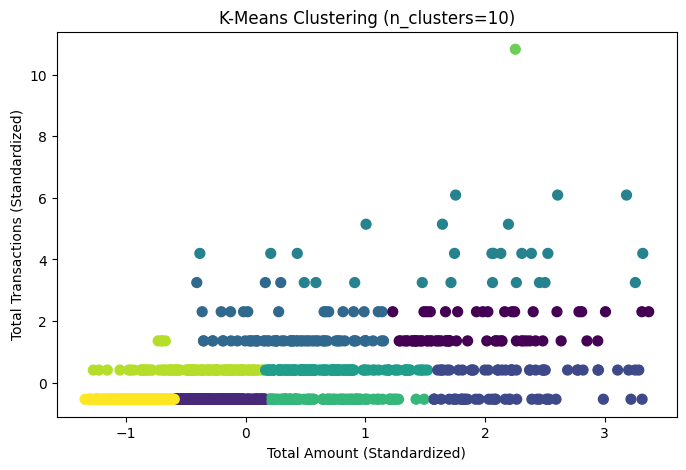

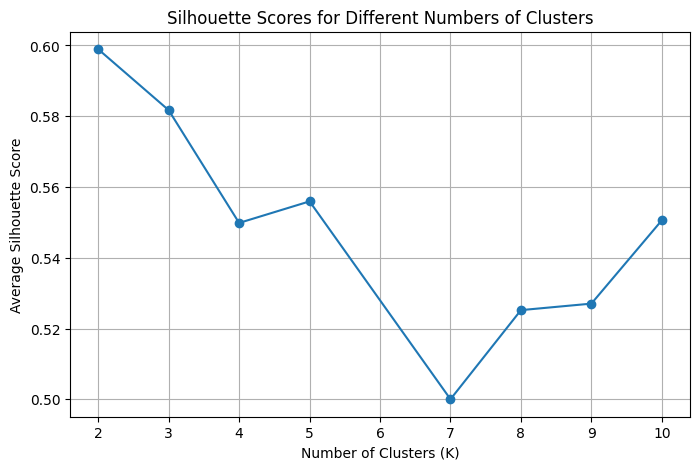

The best number of clusters based on silhouette score: 2


In [ ]:
# Write your code here

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Step 4: Data Preprocessing
df_cleaned = df.dropna(subset=['CustomerID'])
df_cleaned = df_cleaned[(df_cleaned['Quantity'] >= 0) & (df_cleaned['UnitPrice'] >= 0)]
columns_to_drop = ['StockCode', 'InvoiceDate', 'Description', 'Country']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Step 5: Feature Engineering
df_cleaned['Amount'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
df_total_amount = df_cleaned.groupby('CustomerID')['Amount'].sum().reset_index()
df_total_amount.rename(columns={'Amount': 'TotalAmount'}, inplace=True)
df_total_transactions = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
df_total_transactions.rename(columns={'InvoiceNo': 'TotalTransactions'}, inplace=True)
df_segmentation = pd.merge(df_total_amount, df_total_transactions, on='CustomerID')

# Step 6: Checking for Outliers
df_segmentation.drop('CustomerID', axis=1, inplace=True)
# plt.figure(figsize=(8, 5))
# plt.boxplot([df_segmentation['TotalAmount'], df_segmentation['TotalTransactions']], labels=['TotalAmount', 'TotalTransactions'])
# plt.title('Box Plot of TotalAmount and TotalTransactions')
# plt.ylabel('Values')
# plt.show()

# Step 7: Removing Outliers from TotalAmount column
Q1 = df_segmentation['TotalAmount'].quantile(0.25)
Q3 = df_segmentation['TotalAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_segmentation = df_segmentation[(df_segmentation['TotalAmount'] >= lower_bound) & (df_segmentation['TotalAmount'] <= upper_bound)]
print("Shape of DataFrame after removing outliers:", df_segmentation.shape)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_segmentation)
df_scaled = pd.DataFrame(df_scaled, columns=df_segmentation.columns)


# Experiment with different values of n_clusters
n_clusters_list = [2, 3, 4, 5, 7, 8, 9, 10]

silhouette_scores = []

for n_clusters in n_clusters_list:
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_model.fit(df_scaled)
    labels = kmeans_model.labels_

    # Calculate silhouette score
    silhouette_avg = silhouette_score(df_scaled, labels)
    silhouette_scores.append(silhouette_avg)

    # Visualize the clustering results
    plt.figure(figsize=(8, 5))
    plt.scatter(df_scaled['TotalAmount'], df_scaled['TotalTransactions'], c=labels, cmap='viridis', s=50)
    plt.title(f'K-Means Clustering (n_clusters={n_clusters})')
    plt.xlabel('Total Amount (Standardized)')
    plt.ylabel('Total Transactions (Standardized)')
    plt.show()

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(n_clusters_list, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.grid(True)
plt.show()

# Summarize the impact of changes in the number of clusters
best_n_clusters = n_clusters_list[np.argmax(silhouette_scores)]
print(f"The best number of clusters based on silhouette score: {best_n_clusters}")



- The average silhouette score starts very high for a small number of clusters (e.g., 2) and then drops at a larger number of clusters (e.g., 7), it suggests that the data may have a natural structure that is best captured by a smaller number of clusters.

